In [1]:
# ====================================
# ANN Scratch Implementation (XOR)
# ====================================
import math
import random
import matplotlib.pyplot as plt
import os

print("=== ANN Scratch Implementation for XOR ===")
os.makedirs("images", exist_ok=True)


=== ANN Scratch Implementation for XOR ===


In [2]:
# ------------------------
# Helper functions
# ------------------------
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def init_matrix(rows, cols):
    return [[random.uniform(-1, 1) for _ in range(cols)] for _ in range(rows)]


In [4]:
# ------------------------
# Dataset
# ------------------------
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [[0], [1], [1], [0]]

input_size = 2
hidden_size = 2
output_size = 1
lr = 0.5
epochs = 5000

# Initialize weights and biases
W1 = init_matrix(input_size, hidden_size)
b1 = [0]*hidden_size
W2 = init_matrix(hidden_size, output_size)
b2 = [0]*output_size


In [5]:
# ------------------------
# Forward pass
# ------------------------
def forward_pass(sample):
    hidden = [sigmoid(sum(sample[i]*W1[i][j] for i in range(input_size)) + b1[j]) for j in range(hidden_size)]
    output = [sigmoid(sum(hidden[i]*W2[i][j] for i in range(hidden_size)) + b2[j]) for j in range(output_size)]
    return hidden, output

# Test forward pass
print("Forward pass outputs:")
for sample in X:
    _, out = forward_pass(sample)
    print(f"Input: {sample}, Output: {out}")


Forward pass outputs:
Input: [0, 0], Output: [0.6720140331643237]
Input: [0, 1], Output: [0.7083450747616732]
Input: [1, 0], Output: [0.6816704793292716]
Input: [1, 1], Output: [0.718394810014486]


In [7]:
# ------------------------
# Training loop
# ------------------------
for epoch in range(epochs):
    for i in range(len(X)):
        # Forward
        hidden, out = forward_pass(X[i])
        # Backpropagation
        delta_out = [(y[i][0] - out[0]) * sigmoid_derivative(out[0])]
        delta_hidden = [sigmoid_derivative(hidden[j]) * sum(delta_out[k]*W2[j][k] for k in range(output_size)) for j in range(hidden_size)]
        # Update weights
        for j in range(hidden_size):
            for k in range(output_size):
                W2[j][k] += lr * delta_out[k] * hidden[j]
        for j in range(output_size):
            b2[j] += lr * delta_out[j]
        for j in range(input_size):
            for k in range(hidden_size):
                W1[j][k] += lr * delta_hidden[k] * X[i][j]
        for j in range(hidden_size):
            b1[j] += lr * delta_hidden[j]


In [8]:
# ------------------------
# Predictions after training
# ------------------------
print("Predictions after training:")
for sample in X:
    _, out = forward_pass(sample)
    print(f"Input: {sample}, Output: {out}")


Predictions after training:
Input: [0, 0], Output: [0.018848401776151325]
Input: [0, 1], Output: [0.9838106769409726]
Input: [1, 0], Output: [0.9837427612580588]
Input: [1, 1], Output: [0.0168492522062006]


In [11]:
# ------------------------
# Modularized training functions
# ------------------------
def train_one_epoch(X, y):
    for i in range(len(X)):
        hidden, out = forward_pass(X[i])
        delta_out = [(y[i][0] - out[0]) * sigmoid_derivative(out[0])]
        delta_hidden = [sigmoid_derivative(hidden[j]) * sum(delta_out[k]*W2[j][k] for k in range(output_size)) for j in range(hidden_size)]
        for j in range(hidden_size):
            for k in range(output_size):
                W2[j][k] += lr * delta_out[k] * hidden[j]
        for j in range(output_size):
            b2[j] += lr * delta_out[j]
        for j in range(input_size):
            for k in range(hidden_size):
                W1[j][k] += lr * delta_hidden[k] * X[i][j]
        for j in range(hidden_size):
            b1[j] += lr * delta_hidden[j]


In [10]:
# ------------------------
# Modularized training functions
# ------------------------
def train_one_epoch(X, y):
    for i in range(len(X)):
        hidden, out = forward_pass(X[i])
        delta_out = [(y[i][0] - out[0]) * sigmoid_derivative(out[0])]
        delta_hidden = [sigmoid_derivative(hidden[j]) * sum(delta_out[k]*W2[j][k] for k in range(output_size)) for j in range(hidden_size)]
        for j in range(hidden_size):
            for k in range(output_size):
                W2[j][k] += lr * delta_out[k] * hidden[j]
        for j in range(output_size):
            b2[j] += lr * delta_out[j]
        for j in range(input_size):
            for k in range(hidden_size):
                W1[j][k] += lr * delta_hidden[k] * X[i][j]
        for j in range(hidden_size):
            b1[j] += lr * delta_hidden[j]


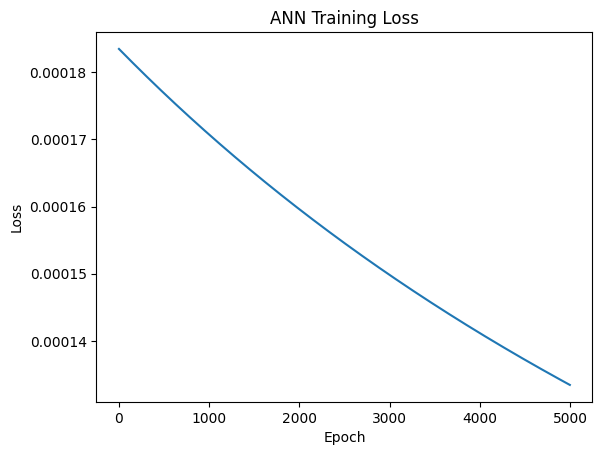

In [12]:
# ------------------------
# Loss computation and visualization
# ------------------------
def compute_loss(X, y):
    loss = 0
    for i in range(len(X)):
        _, out = forward_pass(X[i])
        loss += (y[i][0] - out[0])**2
    return loss / len(X)

losses = []
for epoch in range(epochs):
    for i in range(len(X)):
        hidden, out = forward_pass(X[i])
        delta_out = [(y[i][0] - out[0]) * sigmoid_derivative(out[0])]
        delta_hidden = [sigmoid_derivative(hidden[j]) * sum(delta_out[k]*W2[j][k] for k in range(output_size)) for j in range(hidden_size)]
        for j in range(hidden_size):
            for k in range(output_size):
                W2[j][k] += lr * delta_out[k] * hidden[j]
        for j in range(output_size):
            b2[j] += lr * delta_out[j]
        for j in range(input_size):
            for k in range(hidden_size):
                W1[j][k] += lr * delta_hidden[k] * X[i][j]
        for j in range(hidden_size):
            b1[j] += lr * delta_hidden[j]
    losses.append(compute_loss(X, y))

plt.plot(losses)
plt.title("ANN Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("images/ann_training_loss.png")
plt.show()


Scratch Artificial Neural Network (ANN) Implementation for XOR Problem:
- Forward Pass: Compute hidden layer activations and output using sigmoid.
- Backpropagation: Manual calculation of deltas and weight/bias updates.
- Training Loop: Iterative updates over multiple epochs to minimize MSE loss.
- Modular Functions: forward_pass(), train_one_epoch(), compute_loss().
- Loss Computation: Mean Squared Error (MSE) between predicted and target output.
- Hyperparameter Tuning: Adjustable learning rate, hidden layer size, and epochs.
- Code Refactoring: Meaningful variable names and modularized functions for clarity.
- Visualization: Training loss plotted over epochs.
